# Graphiques
## Répartition des feux de la classe G sur les années 1992 à 2015

In [2]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

import colorcet as cc
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, LogColorMapper

In [3]:
# Import fichier et dréation du dataframe pour les graphiques
conn = sqlite3.connect("data\data_wildfire_usa.sqlite")
fires = pd.read_sql_query("SELECT * FROM fires", conn)
fires_usa = fires.loc[(fires.loc[:,'STATE']!='AK') & (fires.loc[:,'STATE']!='HI') & (fires.loc[:,'STATE']!='PR')]

In [4]:
# Création du dataframe pour les classes de feux les plus grandes
fires_usa_year = pd.DataFrame(fires_usa[['FIRE_YEAR','LATITUDE','LONGITUDE','FIRE_SIZE_CLASS','FIRE_SIZE','STATE']])
fires_usa_year_G = fires_usa_year[fires_usa_year['FIRE_SIZE_CLASS']=='G']

In [5]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = []
fontdict = dict(
    title = 'Répartition des feux de forêts les plus grands (classe G) aux USA, de 1992 à 2015',
    autosize = False,
    width = 1000,
    height = 900,
    hovermode = False,
    legend = dict(
        x=0.7,
        y=-0.1,
        bgcolor="rgba(255, 255, 255, 0)",
        font = dict( size=11 ),
    )
)
years = sorted(fires_usa_year_G['FIRE_YEAR'].unique())

for i in range(len(years)):
    geo_key = 'geo'+str(i+1) if i != 0 else 'geo'
    lons = list(fires_usa_year_G[ fires_usa_year_G['FIRE_YEAR'] == years[i] ]['LONGITUDE'])
    lats = list(fires_usa_year_G[ fires_usa_year_G['FIRE_YEAR'] == years[i] ]['LATITUDE'])
    data.append(
        dict(
            type = 'scattergeo',
            showlegend=False,
            lon = lons,
            lat = lats,
            geo = geo_key,
            name = str(years[i]),
            marker = dict(
                color = "rgb(255, 0, 0)",
                opacity = 0.5
            )
        )
    )
    data.append(
        dict(
            type = 'scattergeo',
            showlegend = False,
            lon = [-78],
            lat = [47],
            geo = geo_key,
            text = [years[i]],
            mode = 'text',
        )
    )
    
    fontdict[geo_key] = dict(
        scope = 'usa',
        showland = True,
        landcolor = 'rgb(229, 229, 229)',
        showcountries = False,
        domain = dict( x = [], y = [] ),
        subunitcolor = "rgb(255, 255, 255)",
    )
    
z = 0
COLS = 5
ROWS = 5
for y in reversed(range(ROWS)):
    for x in range(COLS):
        geo_key = 'geo'+str(z+1) if z != 0 else 'geo'
        fontdict[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)]
        fontdict[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
        z=z+1
        if z > 23:
            break

fig = dict(data=data, layout=fontdict)
config = {'scrollZoom': False}
iplot( fig, filename='US wildfires', config=config)

Ce graphique démontre et suit bien les conclusions que nous avons émises dans le Notebook précédent. Les années où il y a eu le plus de feux sont également les années où il y a eu beaucoup de feux de la classe G, c'est à dire de grandes tailles.

In [6]:
fires_usa_year_G

,FIRE_YEAR,LATITUDE,LONGITUDE,FIRE_SIZE_CLASS,FIRE_SIZE,STATE
16,2004,38.523333,-120.211667,G,16823.0,CA
17,2004,38.780000,-120.260000,G,7700.0,CA
188,2005,33.723333,-111.275000,G,16100.0,AZ
1505,2005,33.613333,-108.558889,G,11936.0,NM
1588,2005,38.169722,-105.038056,G,11357.0,CO
...,...,...,...,...,...,...
1874306,2015,38.342719,-120.695967,G,70868.0,CA
1874773,2015,37.262607,-119.511139,G,5702.0,CA
1877519,2015,38.843988,-122.759707,G,76067.0,CA
1877889,2014,39.833208,-123.631965,G,12535.0,CA


In [8]:
# Création du dataframe pour la classe de feux la plus grande par cause
fires_usa_year_cause = pd.DataFrame(fires_usa[['FIRE_YEAR','LATITUDE','LONGITUDE','FIRE_SIZE_CLASS','FIRE_SIZE','STATE','STAT_CAUSE_DESCR']])
fires_usa_year_cause_G = fires_usa_year_cause[fires_usa_year_cause['FIRE_SIZE_CLASS']=='G']

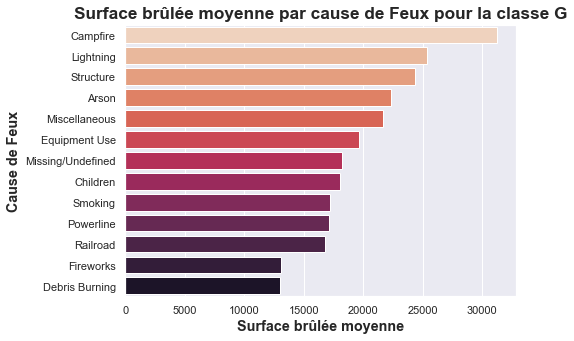

In [10]:
groupby_fires_usa_year_cause_G = fires_usa_year_cause_G.groupby(['STAT_CAUSE_DESCR'], as_index = False)['FIRE_SIZE'].mean()

sns.set({"figure.figsize":(7, 5)})
sns.barplot(x = 'FIRE_SIZE', y = 'STAT_CAUSE_DESCR', data = groupby_fires_usa_year_cause_G.sort_values(by='FIRE_SIZE', ascending=False), palette = 'rocket_r')
plt.xlabel('Surface brûlée moyenne', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Cause de Feux', fontweight = 'bold', fontsize = 'large')
plt.title('Surface brûlée moyenne par cause de Feux pour la classe G', fontsize = 'x-large', fontweight = 'bold')
plt.show()